#### Построения графиков частотности форм слов "соборность", "социабельность", "социальность", "всеединство" в работах Г. Д. Гурвича, Н. Н. Алексеева, С. И. Гессена

Исследование выполнено при поддержке РФФИ, проект № 19-011-00927, «Концепт соборности в философии русского зарубежья: сравнительно-исторический анализ»

This study is supported by the Russian Foundation for Basic Research, Project No. 19-011-00927 «The Concept of Conciliarity in the Philosophy of the Russian Emigration: a Comparative Historical Investigation».

Импортируем необходимые модули.

In [1]:
import search # Модуль, реализующий обращение к базе данных. https://github.com/gleblobanov/sbrnst Автор: Г. Ю. Лобанов
import matplotlib.pyplot as plt
from nltk.text import Text

Функция `get_series` принимает аргументами начальную подстроку слова и идентификационный номер автора (1 -- Г. Д. Гурвич, 2 -- Н. Н. Алексеев, 3 -- С. И. Гессен). Выгружает из базы данных набор текстов указанного автора и упорядоченных по годам. Для каждого года подсчитывает количество слов, которые начинаются с указанной подстроки. Возвращается последовательность элементов, хранящих год и соответствующее ему значение -- количество найденных описанным выше способом слов в этот год.

In [2]:
def get_series(token_part, author):
    res = {}
    for year in range(1917, 2000):
        try:
            corpus = search.create_corpus(author, year)
            text = Text(corpus.words())
            corpus.fileids()
            search_words = [w for w in text if w.startswith(token_part)]
            res[year] = len(search_words)
        except Exception:
            pass
    return res

Поочередно для каждого из авторов строим последовательности, представляющие частоту употребление форм каждого из рассматриваемых слов.

In [3]:
tokens = ["собор", "социаб", "социальн", "общежит", "всеедин"]

# Гурвич

gurvich1 = get_series(tokens[0], 1)
gurvich2 = get_series(tokens[1], 1)
gurvich3 = get_series(tokens[2], 1)
gurvich4 = get_series(tokens[3], 1)
gurvich5 = get_series(tokens[4], 1)

# Алексеев

alekseev1 = get_series(tokens[0], 2)
alekseev2 = get_series(tokens[1], 2)
alekseev3 = get_series(tokens[2], 2)
alekseev4 = get_series(tokens[3], 2)
alekseev5 = get_series(tokens[4], 2)

# Гессен

gessen1 = get_series(tokens[0], 3)
gessen2 = get_series(tokens[1], 3)
gessen3 = get_series(tokens[2], 3)
gessen4 = get_series(tokens[3], 3)
gessen5 = get_series(tokens[4], 3)



utf_8_encode() argument 1 must be str, not None
utf_8_encode() argument 1 must be str, not None
utf_8_encode() argument 1 must be str, not None
utf_8_encode() argument 1 must be str, not None
utf_8_encode() argument 1 must be str, not None


Строим графики для каждого из авторов. Каждый график содержит пять линий, изображающих изменение частоты употребления форм рассматриваемых слов от года к году.

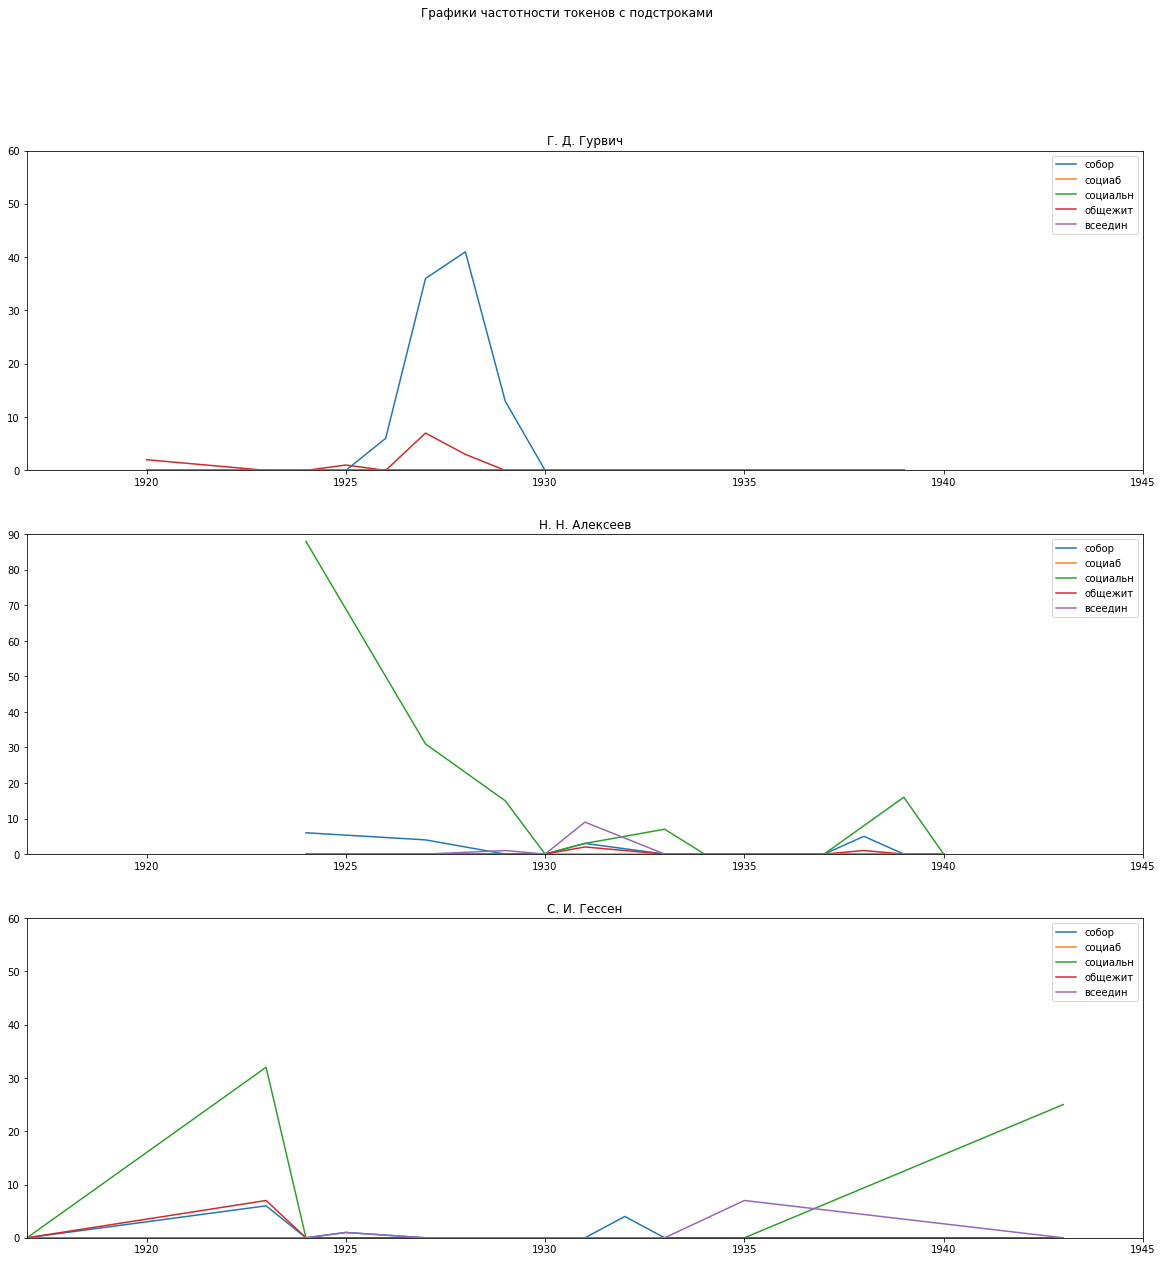

In [6]:
fig, axs = plt.subplots(3, figsize = (20,20))
fig.suptitle('Графики частотности токенов с подстроками')

axs[0].plot(gurvich1.keys(), gurvich1.values(), label = tokens[0])
axs[0].plot(gurvich2.keys(), gurvich2.values(), label = tokens[1])
axs[0].plot(gurvich3.keys(), gurvich3.values(), label = tokens[2])
axs[0].plot(gurvich4.keys(), gurvich4.values(), label = tokens[3])
axs[0].plot(gurvich5.keys(), gurvich5.values(), label = tokens[4])
axs[0].legend()
axs[0].axis([1917, 1945, 0, 60])
axs[0].set_title('Г. Д. Гурвич')

axs[1].plot(alekseev1.keys(), alekseev1.values(), label = tokens[0])
axs[1].plot(alekseev2.keys(), alekseev2.values(), label = tokens[1])
axs[1].plot(alekseev3.keys(), alekseev3.values(), label = tokens[2])
axs[1].plot(alekseev4.keys(), alekseev4.values(), label = tokens[3])
axs[1].plot(alekseev5.keys(), alekseev5.values(), label = tokens[4])
axs[1].legend()
axs[1].axis([1917, 1945, 0, 90])
axs[1].set_title('Н. Н. Алексеев')

axs[2].plot(gessen1.keys(), gessen1.values(), label = tokens[0])
axs[2].plot(gessen2.keys(), gessen2.values(), label = tokens[1])
axs[2].plot(gessen3.keys(), gessen3.values(), label = tokens[2])
axs[2].plot(gessen4.keys(), gessen4.values(), label = tokens[3])
axs[2].plot(gessen5.keys(), gessen5.values(), label = tokens[4])
axs[2].legend()
axs[2].axis([1917, 1945, 0, 60])
axs[2].set_title('С. И. Гессен')



plt.show()